# Exercises
Using the `titanic` data, in your `classification-exercises` repository, create a notebook, `model.ipynb` where you will do the following:

In [1]:
from env import my_setup
my_setup()


import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from env import gdb
from env import Percent
from env import output_chi2_contingency
from sklearn.model_selection import train_test_split
import acquire
import prepare
    


In [2]:
import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from env import gdb
from env import Percent
from env import output_chi2_contingency
from sklearn.model_selection import train_test_split
import acquire
import prepare

In [5]:
df = prepare.prep_titanic()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   alone         891 non-null    int64  
 7   sex_male      891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 49.7 KB
None


In [6]:
df

passenger_id  survived  pclass  sibsp  parch     fare  alone  sex_male
0               0         0       3      1      0   7.2500      0         1
1               1         1       1      1      0  71.2833      0         0
2               2         1       3      0      0   7.9250      1         0
3               3         1       1      1      0  53.1000      0         0
4               4         0       3      0      0   8.0500      1         1
..            ...       ...     ...    ...    ...      ...    ...       ...
886           886         0       2      0      0  13.0000      1         1
887           887         1       1      0      0  30.0000      1         0
888           888         0       3      1      2  23.4500      0         0
889           889         1       1      0      0  30.0000      1         1
890           890         0       3      0      0   7.7500      1         1

[891 rows x 8 columns]

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

### 1. What is your baseline prediction? 

In [18]:
survived_mode = df.survived.mode().values[0]

if survived_mode == 1:
    print(f'We think Everyone Survived!! \n{survived_mode = }')
else:
    print(f'We think Everyone DIED! \n{survived_mode = }')

We think Everyone DIED! 
survived_mode = 0


In [22]:
df['baseline'] = df.survived.value_counts().idxmax()
df

passenger_id  survived  pclass  sibsp  parch     fare  alone  sex_male  \
0               0         0       3      1      0   7.2500      0         1   
1               1         1       1      1      0  71.2833      0         0   
2               2         1       3      0      0   7.9250      1         0   
3               3         1       1      1      0  53.1000      0         0   
4               4         0       3      0      0   8.0500      1         1   
..            ...       ...     ...    ...    ...      ...    ...       ...   
886           886         0       2      0      0  13.0000      1         1   
887           887         1       1      0      0  30.0000      1         0   
888           888         0       3      1      2  23.4500      0         0   
889           889         1       1      0      0  30.0000      1         1   
890           890         0       3      0      0   7.7500      1         1   

     baseline  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
886         0  
887         0  
888         0  
889         0  
890         0  

[891 rows x 9 columns]

In [30]:
df.drop(columns='passenger_id', inplace=True)

### What is your baseline accuracy? 

In [31]:
(df.survived == df.baseline).mean()

0.6161616161616161

### remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 

### When you make those predictions, what is your accuracy? 

In [32]:
(df.survived == df.baseline).mean()

0.6161616161616161

In [33]:
train, validate, test = prepare.split_data(df, 'survived')

Prepared df: (891, 8)

Train: (534, 8)
Validate: (178, 8)
Test: (179, 8)


In [34]:
(train.survived == train.baseline).mean()

0.6161048689138576

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  534 non-null    int64  
 1   pclass    534 non-null    int64  
 2   sibsp     534 non-null    int64  
 3   parch     534 non-null    int64  
 4   fare      534 non-null    float64
 5   alone     534 non-null    int64  
 6   sex_male  534 non-null    uint8  
 7   baseline  534 non-null    int64  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 33.9 KB


### This is your baseline accuracy.

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [41]:
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report

In [36]:
X_cols = ['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male']
y_col = 'survived'

In [38]:
X_train, y_train = train[X_cols], train[y_col]

In [39]:
X_validate, y_validate, X_test, Y_test \
= validate[X_cols], validate[y_col], test[X_cols], test[y_col]


In [42]:
model_1 = DecisionTreeClassifier()

In [45]:
X_train.head()

pclass  sibsp  parch      fare  alone  sex_male
455       3      0      0    7.8958      1         1
380       1      0      0  227.5250      1         0
492       1      0      0   30.5000      1         1
55        1      0      0   35.5000      1         1
243       3      0      0    7.1250      1         1

In [46]:
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [47]:
model_1.fit(X_train, y_train)

print(f'traing score: {model_1.score(X_train, y_train):.2%}')
print(f'validate score: {model_1.score(X_validate, y_validate):.2%}')

traing score: 94.19%
validate score: 75.28%


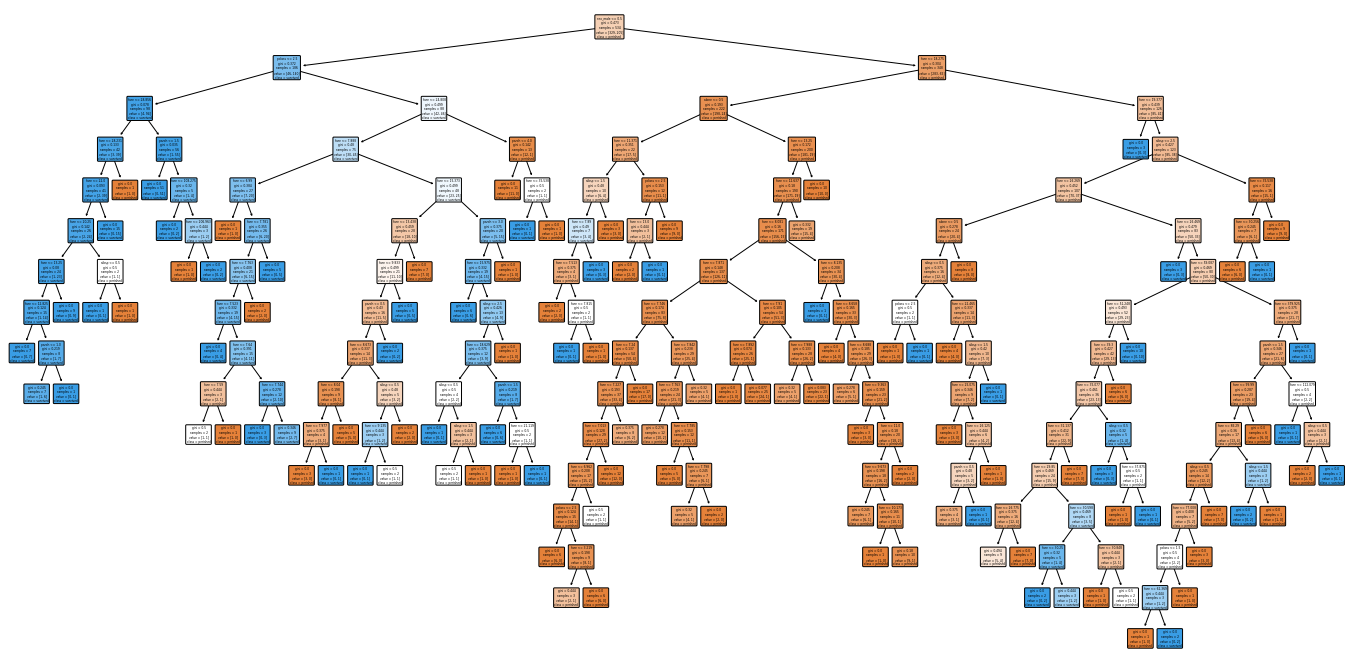

In [50]:
plt.figure(figsize=(24,12))
plot_tree(model_1, 
          feature_names=X_train.columns.to_list(), 
          class_names=['perished', 'survived'],
          filled=True,
          rounded=True
         );

In [51]:
model_1.feature_importances_

array([0.09590748, 0.0622203 , 0.03353685, 0.4279973 , 0.00654879,
       0.37378928])

In [52]:
pd.Series(dict(zip(X_train.columns, model_1.feature_importances_)))

pclass      0.095907
sibsp       0.062220
parch       0.033537
fare        0.427997
alone       0.006549
sex_male    0.373789
dtype: float64

<AxesSubplot:ylabel='Feature Weights'>

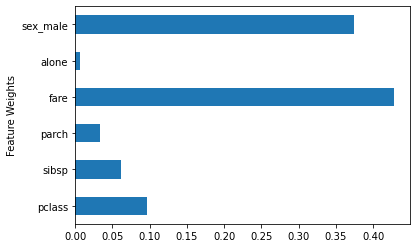

In [58]:
pd.Series(dict(zip(X_train.columns, model_1.feature_importances_))).plot.barh(xlabel='Feature Weights')

### 4. Compute: Accuracy, 

In [94]:
# first, let's create a dataframe for our y predictions and baseline.
preds = pd.DataFrame(
{
    'actual': y_validate.values,
    'baseline': 0,
    'model_1': model_1.predict(X_validate[X_cols]),
    'model_2': model2.predict(X_validate[X_cols]),
#     'model_3': model3.predict(X_validate[X_cols])
})

In [95]:
preds

actual  baseline  model_1  model_2
0         0         0        0        0
1         0         0        0        0
2         0         0        0        0
3         0         0        0        0
4         0         0        0        0
..      ...       ...      ...      ...
173       1         0        0        0
174       0         0        0        0
175       1         0        1        1
176       1         0        1        1
177       0         0        0        0

[178 rows x 4 columns]

In [56]:
(y_preds.y_actual == y_preds.baseline).mean()

0.6179775280898876

In [57]:
(y_preds.y_actual == y_preds.model_1).mean()

0.7528089887640449

In [81]:
accuracy_score(y_preds.y_actual, y_preds.model_1)

0.7528089887640449

### true positive rate, 

In [74]:
((y_preds.y_actual == y_preds.model_1) & (y_preds.y_actual == 1)).value_counts()

False    132
True      46
dtype: int64

In [75]:
# true_positive = 
46/178

0.25842696629213485

### false positive rate, 

In [84]:
((y_preds.y_actual != y_preds.model_1) & (y_preds.y_actual == 1)).value_counts()

22

In [77]:
# false_positive = 
22/178

0.12359550561797752

### true negative rate, 

In [73]:
((y_preds.y_actual == y_preds.model_1) & (y_preds.y_actual == 0)).value_counts()

False    90
True     88
dtype: int64

In [78]:
# true_negative = 
88 / 178

0.4943820224719101

### false negative rate, 

In [79]:
((y_preds.y_actual != y_preds.model_1) & (y_preds.y_actual == 0)).value_counts()

False    156
True      22
dtype: int64

In [80]:
# false_negative = 
22 / 178

0.12359550561797752

### precision, 

In [88]:
Percent(precision_score(y_preds.y_actual, y_preds.model_1))

67.65%

### recall, 

In [90]:
Percent(recall_score(y_preds.y_actual, y_preds.model_1))

67.65%

### f1-score, 

In [92]:
print(classification_report(y_preds.y_actual,y_preds.model_1))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       110
           1       0.68      0.68      0.68        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



### and support.

### 5. Run through steps 2-4 using a different max_depth value.

In [93]:
# TODO: create additional models
# change hyperparameters
# change feature sets
# compare model performance on validate
# make a new thing:
model2 = DecisionTreeClassifier(max_depth=4)
# fit a new thing:
model2.fit(X_train, y_train)
# use a new thing:
model2.score(X_train, y_train)

0.8202247191011236

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

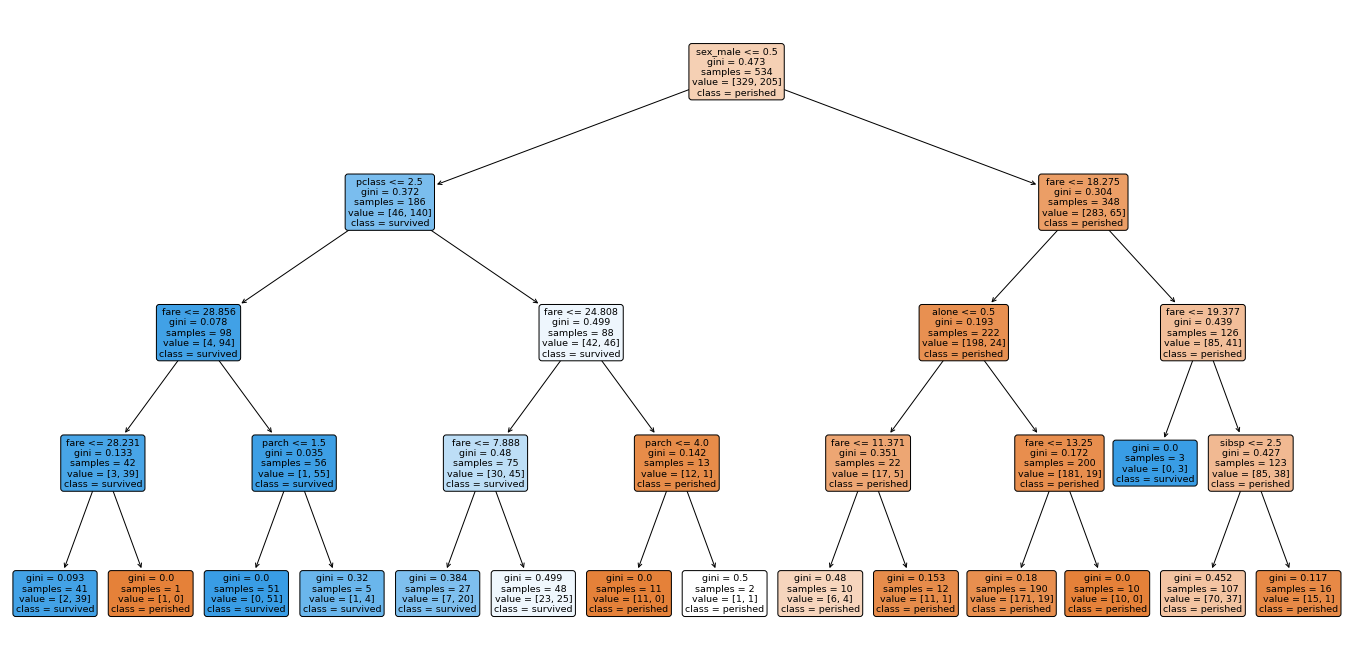

In [98]:
plt.figure(figsize=(24,12))
plot_tree(model2, 
          feature_names=X_train.columns.to_list(), 
          class_names=['perished', 'survived'],
          filled=True,
          rounded=True
         );

<AxesSubplot:ylabel='Feature Weights'>

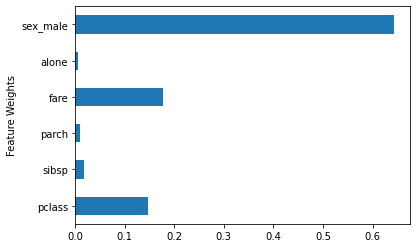

In [99]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.barh(xlabel='Feature Weights')

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [96]:
accuracy_score(preds.actual,preds.model_2)

0.7921348314606742

### 4. Compute: Accuracy, 

### true positive rate, 

In [122]:
TP = ((preds.actual == preds.model_2) & (preds.actual == 1)).value_counts().loc[True]
TPR = TP/len(preds)
TPR

0.25842696629213485

### false positive rate, 

In [121]:
FP = ((preds.actual != preds.model_2) & (preds.actual == 1)).value_counts().loc[True]
FPR = FP/len(preds.actual)
FPR

0.12359550561797752

### true negative rate, 

In [120]:
TN = ((preds.actual == preds.model_2) & (preds.actual == 0)).value_counts().loc[True]
TNR = TN/len(preds)
TNR

0.5337078651685393

### false negative rate, 

In [119]:
FN = ((preds.actual != preds.model_2) & (preds.actual == 0)).value_counts().loc[True]
FNR = FN/len(preds)
FNR

0.08426966292134831

In [123]:
def confusion():
    acc = (TP+TN)/(TP+TN+FP+FN)
    print(f'   Accuracy = {acc:.2%}')
    print(f'  Precision = {(TP/(TP+FP)):.2%}')
    print(f'        NPV = {Percent(TN/(TN+FN))}')
    print(f'     Recall = {Percent(TP/(TP+FN))}')
    print(f'Specificity = {Percent(TN/(TN+FP))}')

In [125]:
confusion()

   Accuracy = 79.21%
  Precision = 67.65%
        NPV = 86.36%
     Recall = 75.41%
Specificity = 81.20%


### precision, 

### recall, 

### f1-score, 

In [128]:
print(classification_report(preds.actual,preds.model_2), classification_report(preds.actual,preds.model_1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       110
           1       0.68      0.68      0.68        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



### and support.

### 6. Which model performs better on your in-sample data?

In [130]:
preds.model_1

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    1
176    1
177    0
Name: model_1, Length: 178, dtype: int64

### 7. Which model performs best on your out-of-sample data, the validate set?

In [131]:
preds.model_2

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    1
176    1
177    0
Name: model_2, Length: 178, dtype: int64

### 1. Work through these same exercises using the Telco dataset.

In [140]:
def prep_telco():
    df = acquire.get_telco_data()

    encode = ['partner', 'dependents', 'phone_service', 'internet_service_type', 
             'contract_type', 'paperless_billing', 'payment_type', 'churn']
    
    combine = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

    df['null_charges'] = pd.to_numeric(df['total_charges'], errors='coerce').isnull()

    df['total_charges'][df['null_charges'] == True] = df['monthly_charges'][df['null_charges'] == True]

    df.total_charges = df.total_charges.astype(float)

    df.drop(columns= ['null_charges', 'gender', 'multiple_lines', 'customer_id'], inplace=True)

    dummy_df = pd.get_dummies(df[encode], drop_first=True)

    df = pd.concat([df, dummy_df], axis=1)

    df = df.drop(columns=encode)
    print(df.info())
    return df

In [244]:
df = prep_telco()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   senior_citizen                        7043 non-null   int64  
 1   tenure                                7043 non-null   int64  
 2   online_security                       7043 non-null   object 
 3   online_backup                         7043 non-null   object 
 4   device_protection                     7043 non-null   object 
 5   tech_support                          7043 non-null   object 
 6   streaming_tv                          7043 non-null   object 
 7   streaming_movies                      7043 non-null   object 
 8   monthly_charges                       7043 non-null   float64
 9   total_charges                         7043 non-null   float64
 10  partner_Yes                           7043 non-null   uint8  
 11  dependents_Yes   

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_88634/3522522056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'][df['null_charges'] == True] = df['monthly_charges'][df['null_charges'] == True]


In [245]:
combine = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

In [237]:
# df['sercvice_add_ons'] = 
df[combine]=='Yes'


online_security  online_backup  device_protection  tech_support  \
0               False           True              False          True   
1               False          False              False         False   
2               False          False               True         False   
3               False           True               True         False   
4               False          False              False          True   
...               ...            ...                ...           ...   
7038             True          False              False          True   
7039            False          False              False         False   
7040            False           True              False         False   
7041             True          False               True          True   
7042             True           True               True         False   

      streaming_tv  streaming_movies  
0             True             False  
1            False              True  
2            False             False  
3             True              True  
4             True             False  
...            ...               ...  
7038         False             False  
7039         False              True  
7040         False             False  
7041         False              True  
7042          True              True  

[7043 rows x 6 columns]

In [247]:
df.online_backup.value_counts(dropna=False)

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [168]:
# df['services']=
df.online_backup.map({'Yes': 1, 'No': 0 })

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
7038    0.0
7039    0.0
7040    1.0
7041    0.0
7042    1.0
Name: online_backup, Length: 7043, dtype: float64

In [248]:
for i in combine:
    df[i] = df[i].map({'Yes': 1, 'No': 0, 'No internet service': 0 })
df[combine]

online_security  online_backup  device_protection  tech_support  \
0                   0              1                  0             1   
1                   0              0                  0             0   
2                   0              0                  1             0   
3                   0              1                  1             0   
4                   0              0                  0             1   
...               ...            ...                ...           ...   
7038                1              0                  0             1   
7039                0              0                  0             0   
7040                0              1                  0             0   
7041                1              0                  1             1   
7042                1              1                  1             0   

      streaming_tv  streaming_movies  
0                1                 0  
1                0                 1  
2                0                 0  
3                1                 1  
4                1                 0  
...            ...               ...  
7038             0                 0  
7039             0                 1  
7040             0                 0  
7041             0                 1  
7042             1                 1  

[7043 rows x 6 columns]

In [249]:
df.online_backup.value_counts(dropna=False)

0    4614
1    2429
Name: online_backup, dtype: int64

In [250]:
df['services'] = df.online_backup + df.online_security + df.device_protection + df.tech_support + df.streaming_movies + df.streaming_tv

In [251]:
df.drop(columns=combine, inplace=True)

In [252]:
df.services.value_counts(dropna=False)

0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
Name: services, dtype: int64

In [253]:
df[(df['contract_type_Two year'] == 1) & (df.tenure < 25)]


senior_citizen  tenure  monthly_charges  total_charges  partner_Yes  \
34                 0      20            39.40         825.40            1   
38                 0      12            20.30         224.50            1   
96                 0      24            19.55         470.20            0   
132                0       8            20.15         165.50            1   
208                0       3            26.40         121.25            0   
227                0      23            19.60         426.65            1   
309                0      13            35.40         450.40            0   
328                0      11            19.65         225.75            1   
423                0      10            29.60         299.05            0   
518                0       4            19.90          76.65            1   
582                0      13            19.55         265.30            1   
611                0       8            44.55         343.45            0   
742                0      24            19.70         494.05            1   
747                0      18            25.10         428.45            1   
748                0      11            19.55         223.15            0   
757                0       1            20.35          20.35            1   
842                0      20            20.05         400.00            1   
858                0      14            20.40         292.40            1   
912                0      18            20.10         370.50            1   
935                0       4            19.55          68.80            1   
945                0       0            56.05          56.05            1   
962                0      24            20.75         487.05            0   
974                0       3            19.10          52.00            1   
1034               0      10            20.15         220.80            1   
1050               0      24            25.15         553.00            0   
1119               0      19            20.50         398.55            0   
1156               0      16            19.70         301.55            1   
1181               0      11            25.00         300.70            1   
1213               0      13            20.40         261.30            0   
1245               0      13            20.85         272.35            1   
1281               0      24            64.35        1558.65            1   
1332               0      23            25.60         514.75            1   
1349               0       8            19.05         201.70            1   
1355               0       8            20.00         141.60            0   
1368               0       6            20.40         107.60            1   
1448               0      14            19.70         263.65            1   
1518               0       8            19.50         162.15            1   
1553               0      15            19.35         278.85            1   
1604               0      18            20.05         388.60            0   
1605               0      23            40.10         857.75            0   
1731               0       0            20.00          20.00            1   
1771               0       6            20.10         100.35            1   
1865               0      15            25.20         387.90            1   
1867               0       3            71.10         213.35            0   
1906               0       0            61.90          61.90            0   
1932               0      23            25.10         611.45            1   
2005               0      18            19.35         309.25            1   
2088               0      19            24.90         467.70            1   
2090               0      21            71.05        1524.85            0   
2140               0      23            20.40         478.75            1   
2145               0      13            19.75         246.70            1   
21

In [254]:
df.drop(index=(df[(df['contract_type_Two year'] == 1) & (df.tenure < 25)].index), inplace=True)

In [255]:
df.drop(index=(df[(df['contract_type_One year'] == 1) & (df.tenure < 13)].index), inplace=True)

In [256]:
df.services.value_counts(dropna=False)


0    2026
3    1087
2    1013
1     960
4     835
5     559
6     281
Name: services, dtype: int64

In [257]:
# df.services.map({df.services[(df.services != 1) &(df.services !=2) &(df.services != 3) & (df.services != 4) & (df.services != 5) & (df.services != 6)]: 0})

In [258]:
train, validate, test = prepare.split_data(df,'churn_Yes')

Prepared df: (6761, 17)

Train: (4056, 17)
Validate: (1352, 17)
Test: (1353, 17)


In [270]:
train

senior_citizen  tenure  monthly_charges  total_charges  partner_Yes  \
1609               0      27            20.35         531.60            0   
2873               0      20            20.65         417.50            1   
5080               0      23            20.15         405.60            0   
4172               0      31            89.30        2823.00            1   
841                0       6            26.35         184.05            0   
...              ...     ...              ...            ...          ...   
2091               1      32           104.90        3351.55            1   
428                1      21            41.90         840.10            0   
1129               1      18            95.45        1752.55            0   
2939               0       5            94.45         498.10            1   
5703               0       6            89.25         487.05            0   

      dependents_Yes  phone_service_Yes  internet_service_type_Fiber optic  \
1609               0                  1                                  0   
2873               0                  1                                  0   
5080               0                  1                                  0   
4172               1                  1                                  1   
841                1                  1                                  0   
...              ...                ...                                ...   
2091               0                  1                                  1   
428                0                  0                                  0   
1129               0                  1                                  1   
2939               0                  1                                  1   
5703               0                  1                                  1   

      internet_service_type_None  contract_type_One year  \
1609                           1                       0   
2873                           1                       1   
5080                           1                       1   
4172                           0                       0   
841                            1                       0   
...                          ...                     ...   
2091                           0                       0   
428                            0                       0   
1129                           0                       0   
2939                           0                       0   
5703                           0                       0   

      contract_type_Two year  paperless_billing_Yes  \
1609                       1                      0   
2873                       0                      0   
5080                       0                      0   
4172                       0                      0   
841                        0                      0   
...                      ...                    ...   
2091                       0                      1   
428                        0                      1   
1129                       0                      1   
2939                       0                      1   
5703                       0                      1   

      payment_type_Credit card (automatic)  payment_type_Electronic check  \
1609                                     1                              0   
2873                                     0                              0   
5080                                     0                              0   
4172                                     0                              1   
841                                      0                              0   
...                                    ...                            ...   
2091                                     0                              1   
428                                      0                              1   
1129                                     0                           

In [276]:
X_cols = train.columns.to_list()
X_cols.remove('churn_Yes')
y_col = 'churn_Yes'

In [277]:
X_cols

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'contract_type_One year',
 'contract_type_Two year',
 'paperless_billing_Yes',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'services']

In [278]:
X_train, y_train = train[X_cols], train[y_col]

In [279]:
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [280]:
# make the thing
model_1 = DecisionTreeClassifier()
# fit the thing
model_1.fit(X_train, y_train)
# use the thing
print(f'training score: {model_1.score(X_train, y_train):.2%}')
print(f'validate score: {model_1.score(X_validate, y_validate):.2%}')

training score: 99.78%
validate score: 70.56%


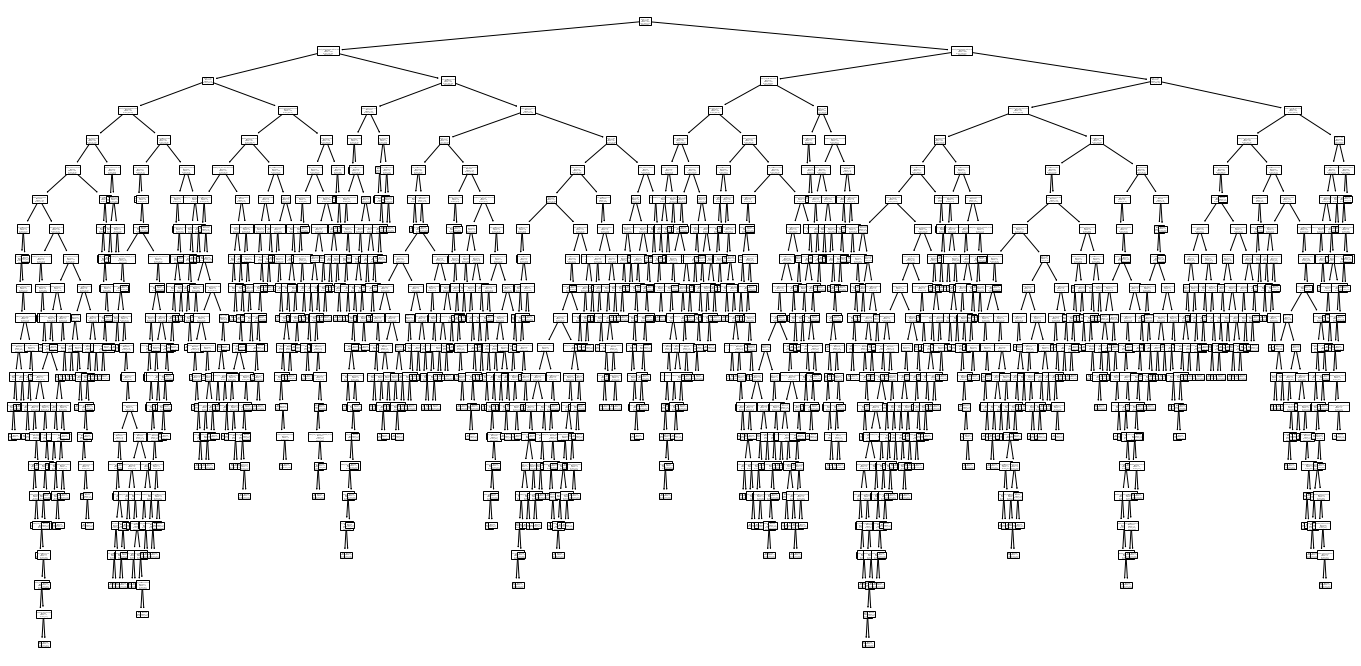

In [281]:
plt.figure(figsize=(24,12))
plot_tree(model_1, feature_names=X_train.columns.to_list(), class_names=['stayed', 'churned']);

In [282]:
model_2 = DecisionTreeClassifier(max_depth=5)
model_2.fit(X_train, y_train)
print(f'training score: {model_2.score(X_train, y_train):.2%}')
print(f'validate score: {model_2.score(X_validate, y_validate):.2%}')

training score: 79.78%
validate score: 77.22%


In [283]:
print(classification_report(preds.actual,preds.model_2), classification_report(preds.actual,preds.model_1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       110
           1       0.68      0.68      0.68        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



In [284]:
model_3 = DecisionTreeClassifier(max_depth=3)
model_3.fit(train[X_cols], train[y_col])
print(f'training score: {model_3.score(X_train, y_train):.2%}')
print(f'validate score: {model_3.score(X_validate, y_validate):.2%}')

training score: 78.06%
validate score: 78.92%


In [286]:
preds = pd.DataFrame(
{
    'actual': validate.churn_Yes,
    'baseline': 0,
    'model_1': model_1.predict(validate[X_cols]),
    'model_2': model2.predict(validate[X_cols]),
    'model_3': model3.predict(validate[X_cols])
})

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- contract_type_One year
- contract_type_Two year
- dependents_Yes
- internet_service_type_Fiber optic
- internet_service_type_None
- ...
Feature names seen at fit time, yet now missing:
- alone
- fare
- parch
- pclass
- sex_male
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 16 features, but DecisionTreeClassifier is expecting 6 features as input.

### 2. Experiment with this model on other datasets with a higher number of output classes.

# Exercises — Random Forest Classifier
Continue working in your `model` file with `titanic` data to do the following:

In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [290]:
df = prepare.prep_titanic()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   alone         891 non-null    int64  
 7   sex_male      891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 49.7 KB
None


In [292]:
df.drop(columns='passenger_id', inplace=True)

In [293]:
train, validate, test = prepare.split_data(df, 'survived')

Prepared df: (891, 7)

Train: (534, 7)
Validate: (178, 7)
Test: (179, 7)


In [296]:
X_cols = df.columns.drop('survived').to_list()
y_col = 'survived'

In [306]:
X_cols, y_col

(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male'], 'survived')

In [298]:
X_train = train[X_cols]
y_train = train[y_col]
X_val = validate[X_cols]
y_val = validate[y_col]
X_test = test[X_cols]
y_test = test[y_col]

In [307]:
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [300]:
rf = RandomForestClassifier(random_state=1491, min_samples_leaf=1, max_depth=10)

In [301]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=1491)

In [303]:
model_1 = rf.predict(X_train)
model_1

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [324]:
preds = [{
    'actual': y_train,
    
}]
pd.DataFrame(preds).T

0
actual  455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222  ...

In [321]:
preds['actual'] = y_train

TypeError: list indices must be integers or slices, not str

In [305]:
preds

actual  baseline  model_1  model_2
0       0.0         0        0        0
1       1.0         0        0        0
2       NaN         0        0        0
3       NaN         0        0        0
4       NaN         0        0        0
..      ...       ...      ...      ...
173     0.0         0        0        0
174     NaN         0        0        0
175     NaN         0        1        1
176     NaN         0        1        1
177     0.0         0        0        0

[178 rows x 4 columns]

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

### 6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?